#Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries/packages it becomes a powerful environment for scientific computing. This labsheet is a brief introduction to some of the popular packages that we would be using through out the course of the Lab.

##Numpy[[1]](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb)

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. 

MATLAB and Numpy have a lot in common as in the basic data type is a multi-dimensional array. But there are some stark differences
* Array assignments in MATLAB are stored as 2D arrays of double precision floating point numbers, unless you specify the number of dimensions and type. Where as in Numpy Array assignments are usually stored as n-dimensional arrays with the minimum type required to hold the objects in sequence, unless you specify the number of dimensions and type.  

* In MATLAB, operations on the 2D instances of arrays are modeled on matrix operations in linear algebra. Numpy performs operations element-by-element, so multiplying 2D arrays with * is not a matrix multiplication – it’s an element-by-element multiplication. 

* MATLAB numbers indices from 1; a(1) is the first element where as Numpy, like Python, numbers indices from 0; a[0] is the first element.

To use Numpy, we first need to import the `numpy` package at the beginning of your code using the statement:

In [87]:
import numpy as np

###Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
a

In [ ]:
b = np.array([[1,2,3],[4,5,6],[7,8,9]])   # Create a rank 2 array
b

In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c)

In [ ]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

###Array indexing

Numpy offers several ways to index into arrays.

**Slicing:** Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [88]:

 
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
 
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [89]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [90]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Three ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [91]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [92]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
col_r3=a[:,[1]]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)
print(col_r3,col_r3.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing:** When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [93]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [94]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [95]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [96]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [97]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Boolean array indexing:** Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [98]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [99]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


###Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [101]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1.0, 2.0], dtype=np.int64)  # Force a particular datatype
 
print(x.dtype, y.dtype, z.dtype)


int64 float64 int64


###Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [102]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [103]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [104]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [105]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [106]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [107]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [108]:
print(v @ w)

219


In [109]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [110]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [111]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]



Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [112]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [113]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


###Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [116]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)


[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [117]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [118]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


###Linear Algebra

The numpy package also contains a linear algebra module that helps us in evaluating the following 

1.   rank, determinant etc. of an array.
2.   eigen values of matrices
3.   matrix and vector products (dot, inner, outer,etc. product), matrix exponentiation




In [119]:
A = np.array([[6, 1, 1],
              [4, -2, 5],
              [2, 8, 7]])
 
B = np.array([[1, 2, 3], 
              [4, 5, 6]])
# Rank of a matrix
print("Rank of A:", np.linalg.matrix_rank(A))
 
 
# Determinant of a matrix
print("\nDeterminant of A:", np.linalg.det(A))
 
# Inverse of matrix A
print("\nInverse of A:\n", np.linalg.inv(A))

#Pseudoinverse of a matrix (used when a matrix is not square)
print('\n Pseudoinverse of B: \n', np.linalg.pinv(B))

#Matrix raised to the power 3 
print("\nMatrix A raised to power 3:\n",
           np.linalg.matrix_power(A, 3))

#Eigen value calculation
a = np.diag((1, 2, 3))
 
print("\n Array is :\n",a)
 
# calculating an eigen value
# using eig() function
c, d = np.linalg.eig(a)
 
print("\nEigen value is :\n",c)
print("\nEigen vector is :\n",d)

Rank of A: 3

Determinant of A: -306.0

Inverse of A:
 [[ 0.17647059 -0.00326797 -0.02287582]
 [ 0.05882353 -0.13071895  0.08496732]
 [-0.11764706  0.1503268   0.05228758]]

 Pseudoinverse of B: 
 [[-0.94444444  0.44444444]
 [-0.11111111  0.11111111]
 [ 0.72222222 -0.22222222]]

Matrix A raised to power 3:
 [[336 162 228]
 [406 162 469]
 [698 702 905]]

 Array is :
 [[1 0 0]
 [0 2 0]
 [0 0 3]]

Eigen value is :
 [1. 2. 3.]

Eigen vector is :
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. A few of the commands popularly used in MATLAB along with their numpy equivalent is given below [[2]](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html). 


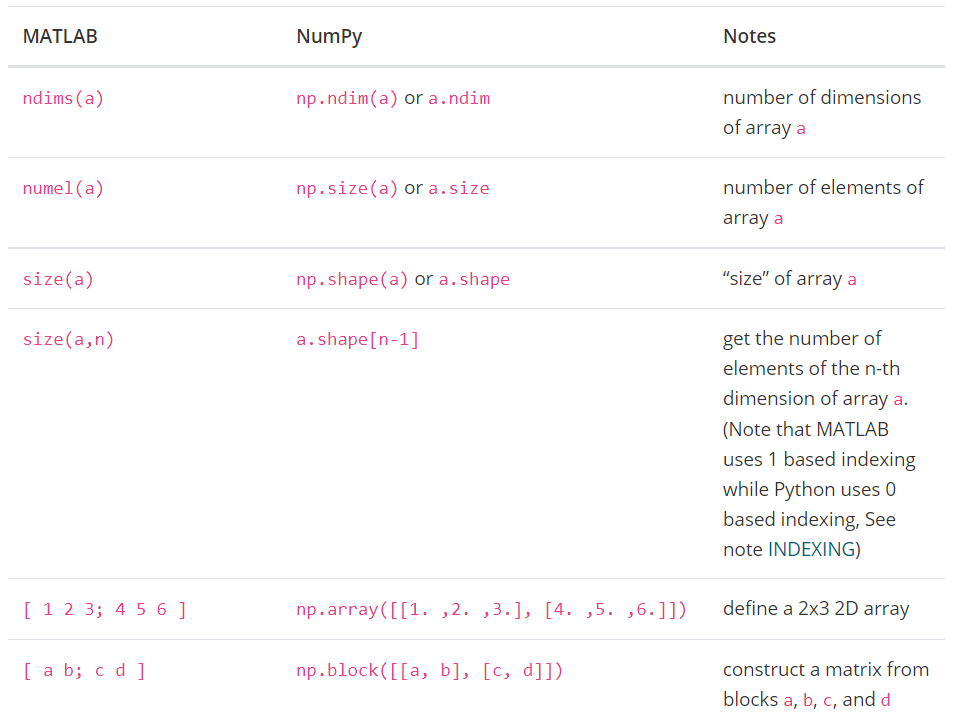

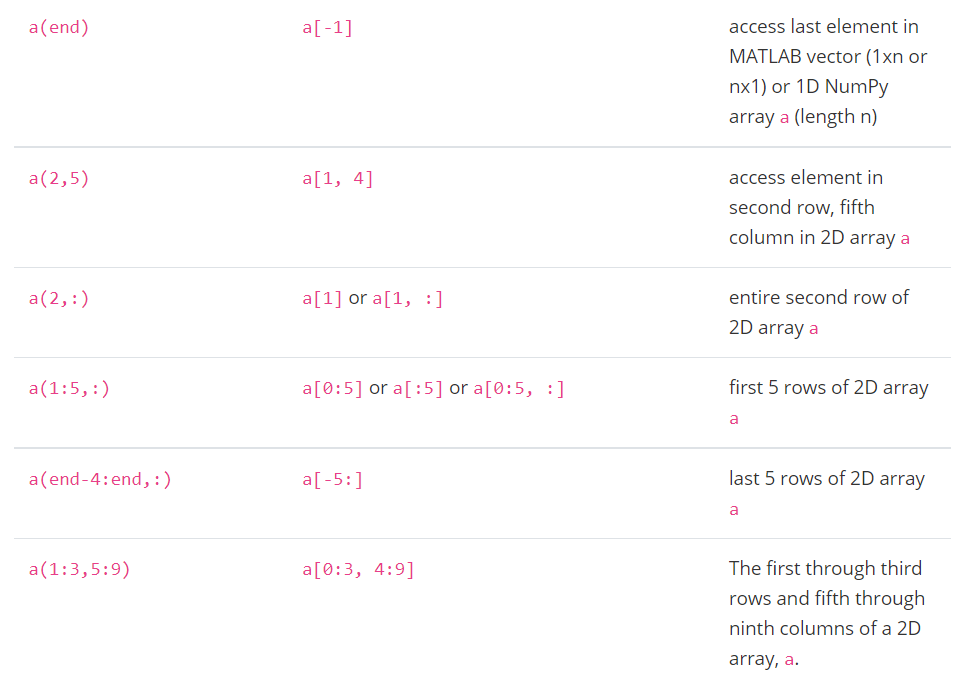

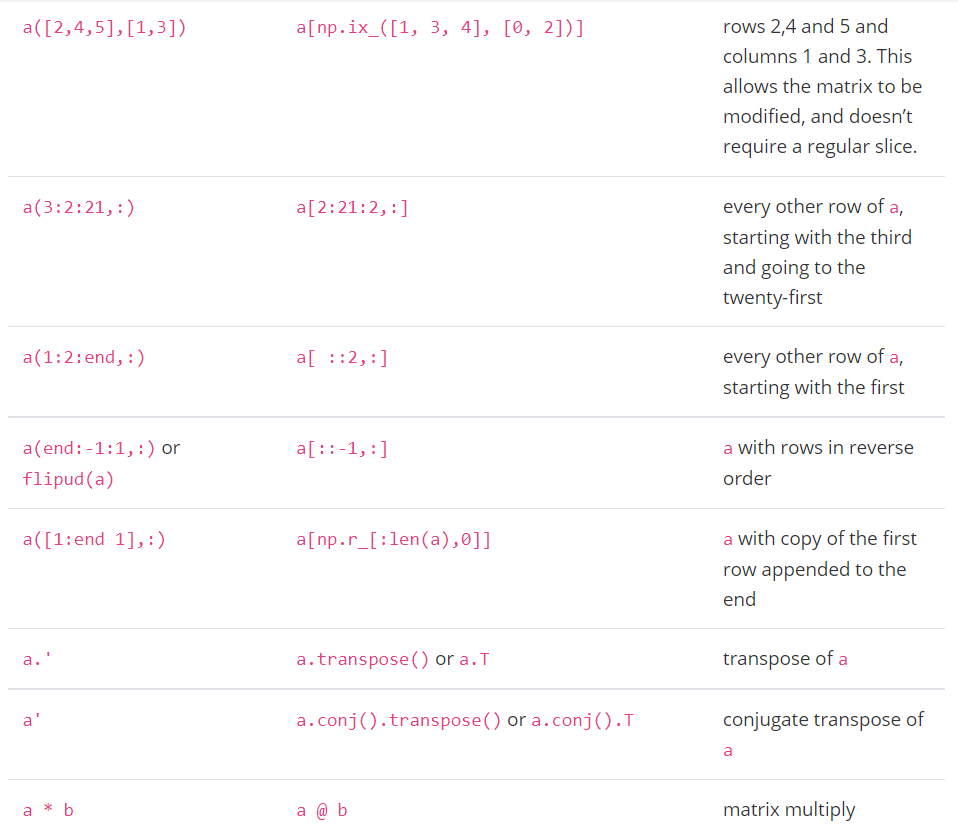

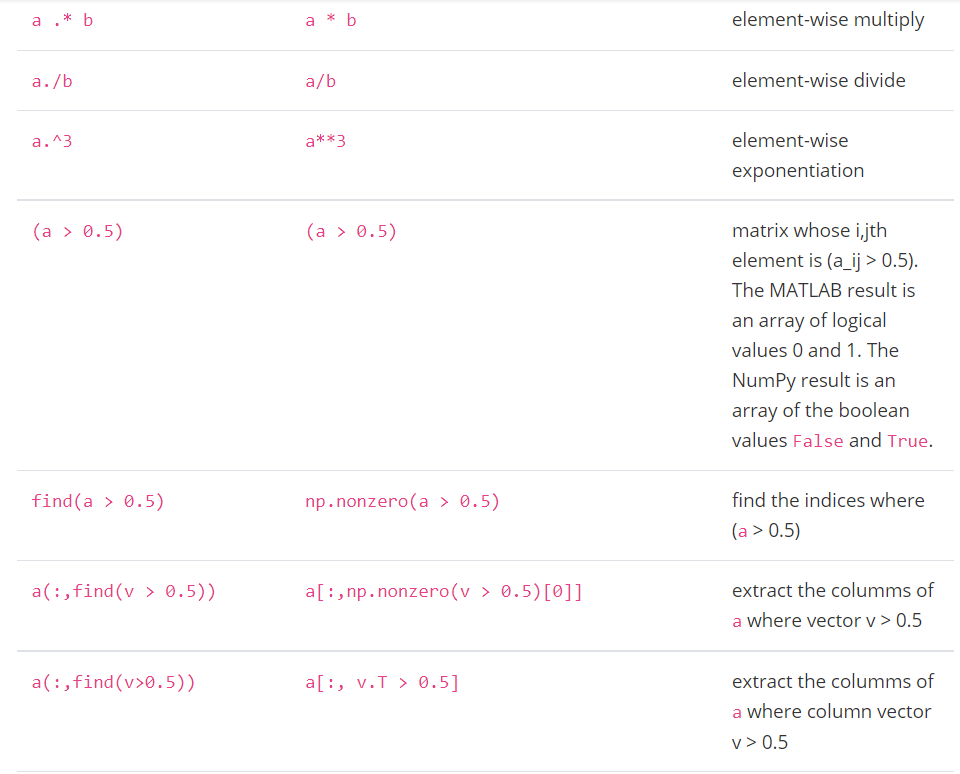

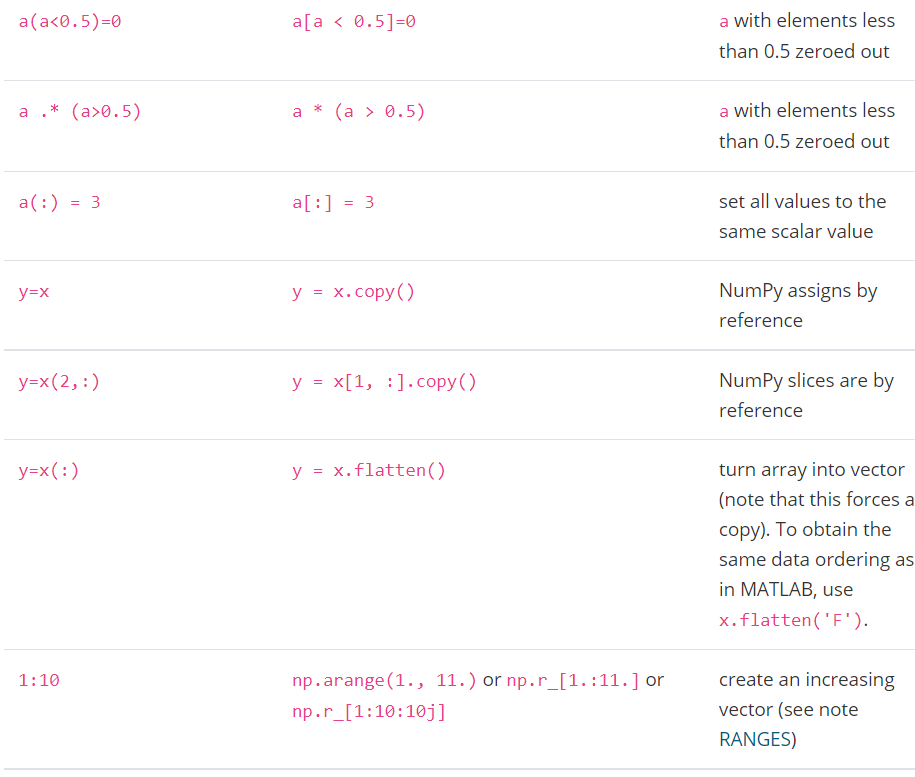

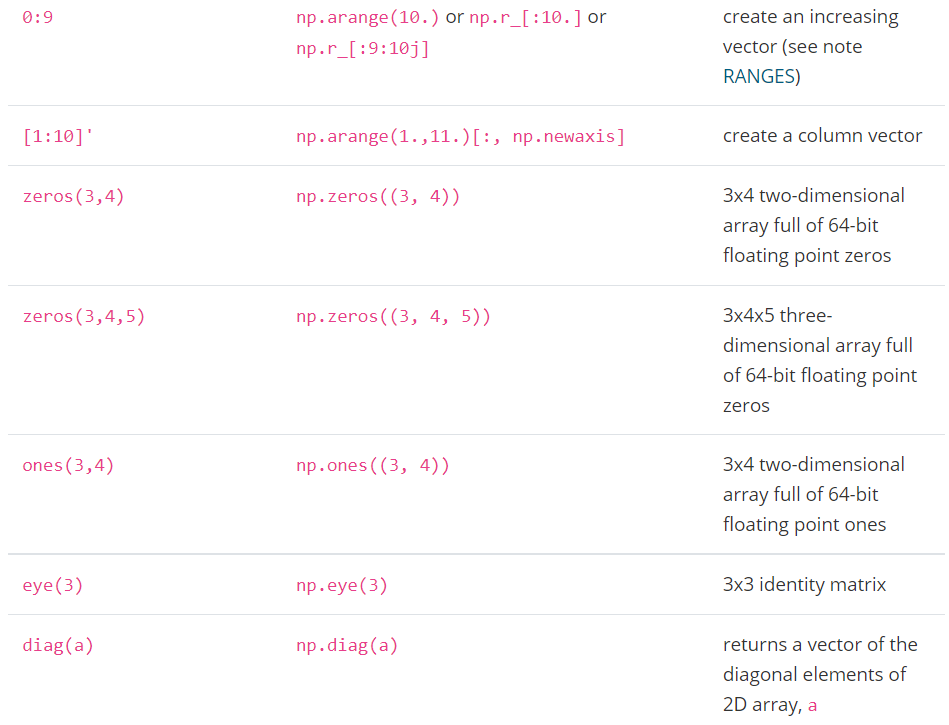

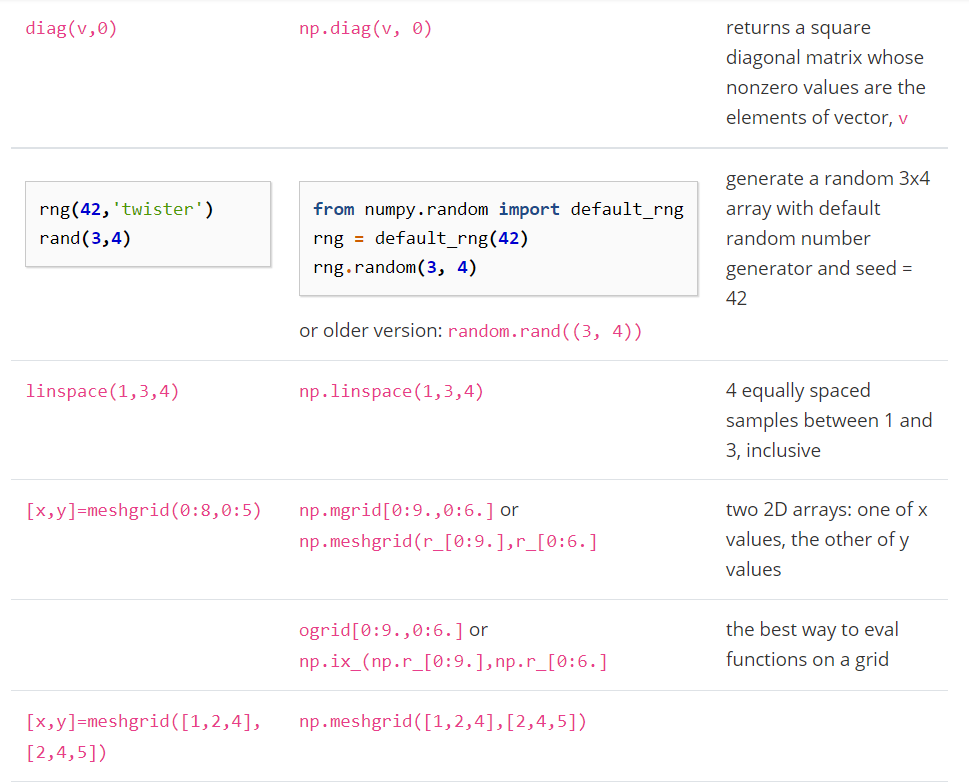

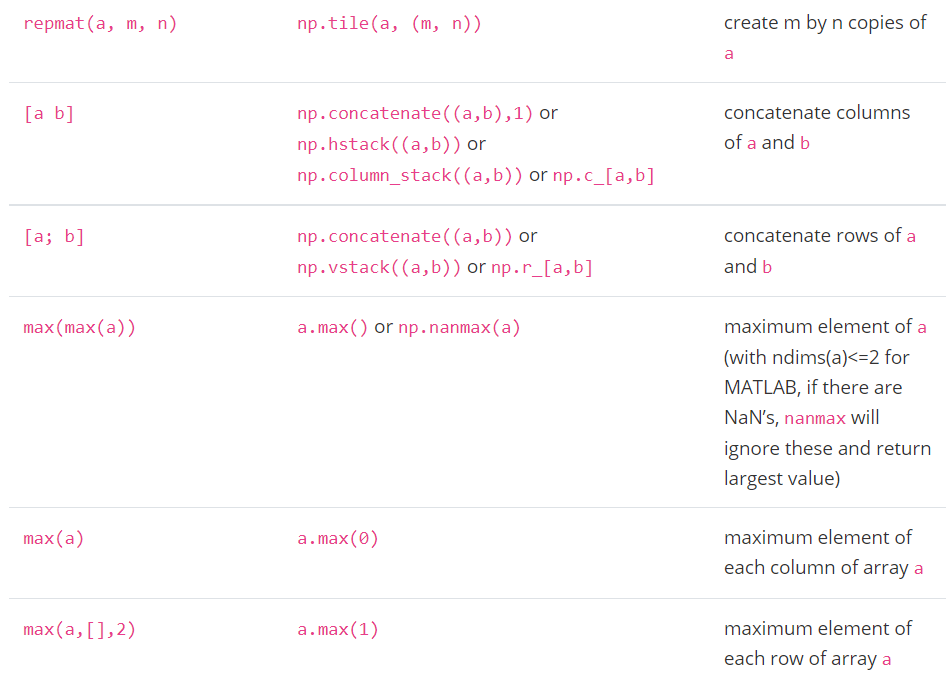

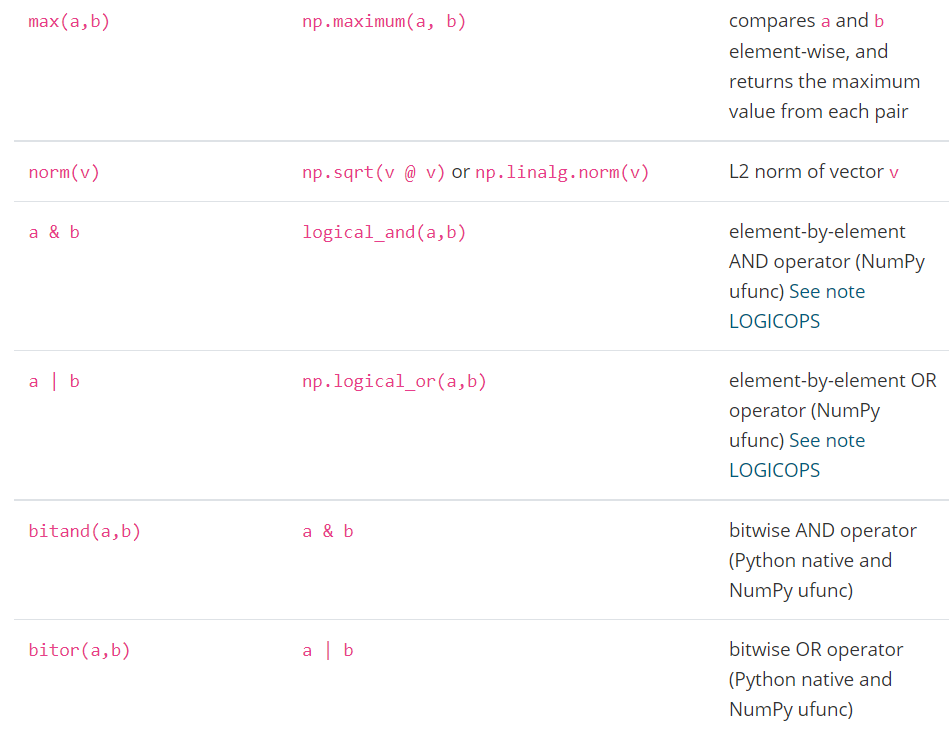

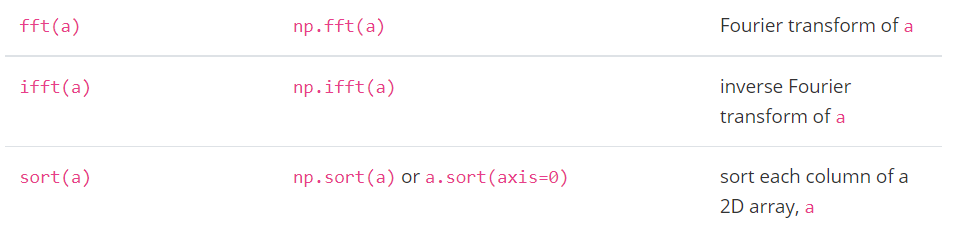

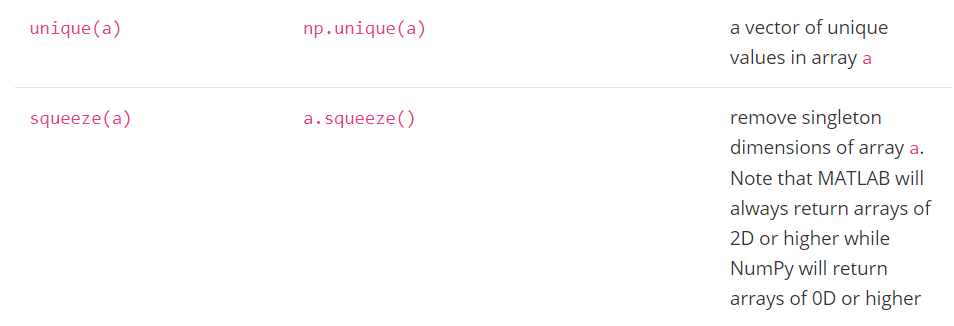

##Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB. To use this package, we first need to import the package at the beginning of your code just like how you did for `numpy`:

In [120]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be able to display plots inline in the Notebook:

In [121]:
%matplotlib inline

###Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

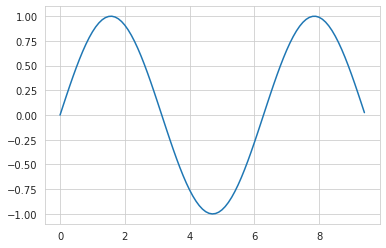

In [124]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

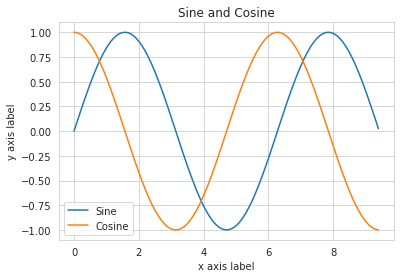

In [125]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

Apart from line plots you can also generate other types of plots. The code cell below shows how to plot a bar plot.

Text(0.5, 1.0, 'Information')

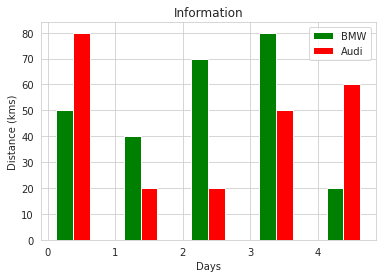

In [132]:
plt.bar([0.25,1.25,2.25,3.25,4.25],[50,40,70,80,20],
label="BMW",color='g', width=.25)
plt.bar([.5,1.5,2.5,3.5,4.5],[80,20,20,50,60],
label="Audi", color='r',width=.25)
plt.legend()
plt.xlabel('Days')
plt.ylabel('Distance (kms)')
plt.title('Information')


Another prominant plot that may be of use is the Histogram plot[[3]](https://www.edureka.co/blog/python-matplotlib-tutorial/). Histograms are used to show a distribution whereas a bar chart is used to compare different entities. Histograms are useful when you have arrays or a very long list. Let’s consider an example where you have to plot the distribution of the age of population with respect to bin. Now, bin refers to the range of values that are divided into series of intervals. Bins are usually created of the same size. In the below code, the bins are created in the interval of 10 which means the first bin contains elements from 0 to 9, then 10 to 19 and so on.

Text(0.5, 1.0, 'Histogram')

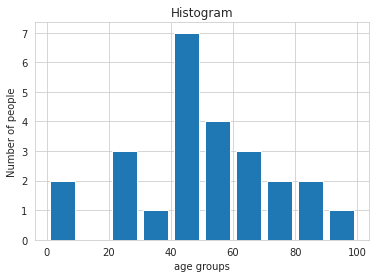

In [133]:
population_age = [22,55,62,45,21,22,34,42,42,4,2,102,95,85,55,110,120,70,65,55,111,115,80,75,65,54,44,43,42,48]
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(population_age, bins, histtype='bar', rwidth=0.8)
plt.xlabel('age groups')
plt.ylabel('Number of people')
plt.title('Histogram')

Another type of plot that we use in Machine learning is the scatter plot. Usually we need scatter plots in order to find out how the data is distributed. The data is displayed as a collection of points, each having the value of one variable which determines the position on the horizontal axis and the value of other variable determines the position on the vertical axis. 

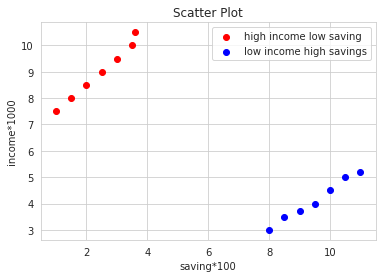

In [134]:
x = [1,1.5,2,2.5,3,3.5,3.6]
y = [7.5,8,8.5,9,9.5,10,10.5]
 
x1=[8,8.5,9,9.5,10,10.5,11]
y1=[3,3.5,3.7,4,4.5,5,5.2]
 
plt.scatter(x,y, label='high income low saving',color='r')
plt.scatter(x1,y1,label='low income high savings',color='b')
plt.xlabel('saving*100')
plt.ylabel('income*1000')
plt.title('Scatter Plot')
plt.legend()

###Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

Text(0.5, 1.0, 'Cosine')

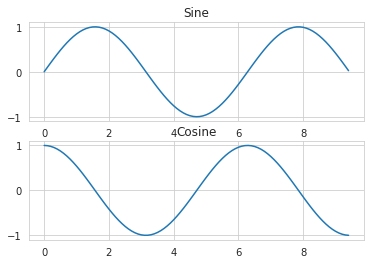

In [135]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')



# Visualization with Matplotlib and Seaborn

In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [ ]:
#setting configs plot size 5x4 inches and seaborn style whitegrid
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

# Creating Line Chart

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,3,4,1,4,3,2,1,8]
plt.plot(x,y)

## ploting from Pandas object

In [ ]:
cars = pd.read_csv("/content/mtcars.csv")
cars.head()

In [ ]:
cars.plot()

In [ ]:
mpg = cars.mpg*10
mpg.plot(color='red')
cars.hp.plot(color='blue')
#cars.loc[:,['mpg','hp']].plot()

In [ ]:
hp_small = cars.hp/10
cars.mpg.plot()
hp_small.plot()

In [ ]:
cars.plot()

In [ ]:
plt.plot(cars.mpg, cars.hp)

In [ ]:
#plot several variables
cars.mpg = cars.mpg/10
df = cars.loc[:,['cyl','mpg','wt']]

df.plot()

## Creating Bar Charts

In [ ]:
# creating simple bar using old X and Y 
plt.barh(x,y)

In [ ]:
#plt.bar(x,y)
cars.mpg.plot(kind='barh')

In [ ]:
sales = [230,340,560,200]
plt.pie(sales)
plt.show()

In [ ]:
cars.mpg[3:7].plot(kind='pie')

In [ ]:
sqft = [1000,2000,1200,1500,1600]
price =[50,200,80,100,120]
plt.scatter(sqft,price)

In [ ]:
plt.scatter(x,y)

# Creating Pie Chart

In [ ]:
X = [1,2,4,3,5]
plt.pie(X)
plt.show()

In [ ]:
x = [1,2,4,3,5]
highlight = [0,0.1,0,0,0]
plt.pie(x,highlight)
plt.show()

In [ ]:
x = [1,12,4,3,5]
highlight = [0,0,0,0,0.1]
plt.pie(x,highlight)
plt.savefig("10-Nov-report.png", format='png',transparent=True )
plt.show()

# Saving a plot

In [ ]:
%pwd

In [ ]:
x = [1,2,4,3,5]
highlight = [0.5,0,0,0,.2]
plt.pie(x,highlight)
plt.savefig('/content/pie_01sep.png',format='png', transparent=True)
plt.show()

# Object Oriented Plotting

In [ ]:
# steps for Object oriented plotting
#1. Create blank figure obj, 2. add axes 3, generate plot(s) within obj 4. specify plotting and layout parameters
# creating data
x = [1,2,3,4,5,6,7,8,9]
y = [1,2,3,4,1,4,3,2,8]

fig = plt.figure() # creates canvas.. simply blank place, 
# axes def, in list, where to place axis . left .1 , bottom .1, width 1 and height 1 
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)

## setting axes limits and ticks

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1,2,7,4,0,4,3,2,9,5]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlim([1,10])
ax.set_ylim([0,10])
ax.set_xticks([1,3,4,5,7])
ax.set_yticks([0,1,2,3,4,5,9])
ax.plot(x,y)

# Generating mulitiple plots

In [ ]:
rcParams['figure.figsize'] = 10,6
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
# subplots using number rows and col 1 and 2
fig, ax = plt.subplots(2,3)
ax[0,0].set_xlim([0,5])
ax[0,0].barh(x,y)
ax[0,1].plot(x,y)
ax[0,2].scatter(x,y)
ax[1,0].plot(x)
ax[1,1].pie(y)
ax[1,2].bar(y,x)


# Plot formatting

In [ ]:
sales=[100,200,150,170]
profit = [0.4,0.2,0.6,0.3]
year = [2015,2016,2017,2018]
plt.bar(year,sales, width = profit)

In [ ]:
# colors - colors are important to make it more meaningful
#line styles - matplotlib has custom line styles et.,
rcParams['figure.figsize'] = 6,3

x = [1,2,3,4,5]
y = [1,2,3,4,1]
plt.bar(x,y,color=['red','blue'], width=[0.8,0.2,0.5,0.8,0.8])
#plt.bar(x,y,color=['green','red'], width = [0.4,.2,.5,.6,.1])

In [ ]:

plt.bar(x,y,color=['red','blue'],width=[0.2,.4,.5,1,.1])

In [ ]:
plt.plot(x,y,lw=3,ls=':' ,color='green',marker='o',mew=1,
        markerfacecolor='blue')

In [ ]:
rcParams['figure.figsize'] = 6,4
x = range(0,10)
y = [1,2,3,4,1,4,7,2,4,7]
wide = [1,0.5,0.5,0.5,0.3,0.9,0.5,0.5,0.5,0.3]
color=['orange','red','green']
plt.bar(x,y,width=wide, color=color)

In [ ]:
color_theme = ['red', 'blue','yellow','green']
df.plot(color=color_theme)

## Customing line

In [ ]:
X = range(0,30)
Y = np.random.randint(10,100,30)

In [ ]:
c = []
for i in Y:
    c.append(i%2)

In [ ]:
c = [1,0,1,0]

In [ ]:
c

In [ ]:
plt.scatter(x,y)

In [ ]:
x = range(1,10)
y = [1,2,3,4,1,4,3,2,1]
plt.plot(x,y)


In [ ]:
rcParams['figure.figsize'] = 5,4
plt.plot(x,y,ls='-.', lw=4)


In [ ]:
plt.plot(x,y,ls='-.', lw=3)

## Setting Plot Markers

In [ ]:
print(x)
print(y)

In [ ]:
plt.plot(x,y,lw=2,marker = '^', mew = 10)


## Labels and Annotations 

In [ ]:
# .annotate(xy,xytext, and arrowprop)
# .legend (label and loc)

x = range(1,10)
y = [1,2,3,4,0.5,4,3,2,1]
plt.bar(x,y)



In [ ]:
plt.xlabel('Year',fontsize=15)
plt.ylabel('Sales in Million USD',fontsize=15)
plt.bar(x,y)

In [ ]:
z = [2,4,5,7]
select = [0,0,0.2,0]
label_names = ['Displays','Music Products','Phones','Other Products']
plt.pie(z,select,labels=label_names)
plt.show()

## annotation for Object Oriented Method

In [ ]:
mpg = cars.mpg*10
fig = plt.figure()
ax = fig.add_axes([.1,.1,2,1.2])
ax.set_xticks(range(32))
ax.set_xticklabels(cars.model, rotation =60, fontsize=12)
ax.set_title('Miles per Gallon of Cars in mtcars',fontsize=25)
ax.set_xlabel('car names',fontsize=15)
ax.set_ylabel('miles/gal',fontsize=25)
ax.bar(range(32),mpg)


## Adding Legend

In [ ]:
z = [2,4,5,7]
high = [0.2,0,0,0]
cat = ['Displays','Music Products','Other Products',"unknown"]
plt.pie(z,high)
plt.legend(cat,loc='best')
plt.show()

In [ ]:
mpg.max()

In [ ]:
rcParams['figure.figsize'] = 7,4
mpg = cars.mpg*10
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
ax.set_xticks(range(32))
ax.set_xticklabels(cars.model, rotation=60,fontsize=10)
ax.set_title('Miles per Gallon of Cars in mtcars')
ax.set_xlabel('car names')
ax.set_ylabel('miles/gal')
#ax.legend(loc='best')
ax.set_ylim([0,45])
ax.annotate('error in server config', xy=(19,20.9), xytext=(24,40),arrowprops=dict(facecolor='blue'))
ax.bar(range(32),mpg)

## Statistical Plots

In [ ]:
#histograms
from pandas.plotting import scatter_matrix



In [ ]:
#Getting over view of data sets with histograms

mpg.plot(kind='hist')

In [ ]:
plt.hist(mpg)

In [ ]:
#using seaborn
sb.distplot(mpg)

In [ ]:
# scatter plot

cars.plot(kind='scatter',x='hp', y='mpg', c=['green'],s=150)

In [ ]:
sb.regplot(x='hp', y='mpg', data = cars, scatter = True)

In [ ]:
## Generating a scatter plot matrix

sb.pairplot(cars.loc[:,['hp','mpg']])

In [ ]:
cars.boxplot(column='mpg',by='am')

In [ ]:
plt.boxplot(cars.mpg)
plt.show()

In [ ]:
sb.boxplot(x='am',y='hp', data = cars)

In [ ]:
sb.pairplot(cars)

#Reading various file formats

Next we will look at how to read and write various file formats such as images, excel files in Comma Separated Values [(csv)](https://en.wikipedia.org/wiki/Comma-separated_values) format, and `.mat` files that are popularly used in MATLAB.

###Image files

For reading and displaying image files in Python,  we make use of the image of model Lena that is popularly used in image processing. First we upload the image into your colab notebook by clicking on `Files` tab at the left hand side. Hover your cursor to the `content` folder. You will see an icon with three dots. Click on it and select `Upload`. Select the file `Lena.png`from your system.   

There are many approaches to read and display images in Python. The first approach is by using OpenCV package. 


In [ ]:
# importing OpenCV(cv2) module
import cv2
from google.colab.patches import cv2_imshow

# Save image in set directory
# Read RGB image
img = cv2.imread('/content/Lena.png',cv2.IMREAD_UNCHANGED) 
  
# Output img 
cv2_imshow(img) 
  
#Reading a grey version of the image
img1 = cv2.imread('/content/Lena.png',0) 
  
# Output img1 
cv2_imshow(img1) 

To write an image using OpenCV we use the `imwrite` function.

In [ ]:
cv2.imwrite('grey_Lena.jpg',img1)

The next approach is by using `Matplotlib`package. 

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
  
# Read Images
img = mpimg.imread('/content/Lena.png')
  
# Output Images
plot1=plt.figure(1)
plt.imshow(img)

# Output Grey Image
plot2=plt.figure(2)
plt.imshow(img[:,:,1], cmap='gray')

#Save the image
plt.imsave('Lena_matplotlib.png',img)


Another approach is by using Python Imaging Library (PIL)

In [ ]:
from PIL import Image as Im,ImageOps
from IPython.display import Image  
# Read image
img1 = Im.open('/content/Lena.png')   

# Output Images
display(img1)

# Output Grey Image
img2 = ImageOps.grayscale(img1)
display(img2)

#Save the image
img2.save('greyscale_Lena_PIL.png')


###CSV (Comma Separated Values) files [[4]](https://www.geeksforgeeks.org/reading-csv-files-in-python/) [[5]](https://www.geeksforgeeks.org/writing-csv-files-in-python/)

**CSV (Comma Separated Values)** is a simple file format used to store tabular data, such as a spreadsheet or database. A CSV file stores tabular data (numbers and text) in plain text. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. The use of the comma as a field separator is the source of the name for this file format.

There are 2 main ways to read a CSV file and that uses either the CSV module or the pandas library. Let us first see how it is done using CSV module. The CSV module reads the file like how we used to read files in C/C++ and maps the data into lists. 

In [ ]:
import csv
import numpy as np
 
# opening the CSV file
with open('/content/Organization.csv', mode ='r')as file:
   
  # reading the CSV file
  csvFile = csv.reader(file)
  
  # displaying the contents of the CSV file
  for lines in csvFile:
        print(lines)

 #Assigning contents in a Numeric csv file into a Numpy array
  var1= np.genfromtxt('/content/Numeric.csv', delimiter=',')
  print(var1)

  #Saving the contents in a Numpy array into a CSV file
  np.savetxt('/content/NewNumeric.csv', var1, delimiter=',')

Another approach to read CSV files is by using the `pandas` package. An example program regarding the same is given below

In [ ]:
import pandas
 
# reading the CSV file
csvFile = pandas.read_csv('/content/Organization.csv')
 
# displaying the contents of the CSV file
print(csvFile)

# reading the Numeric CSV file
csvFile1 = pandas.read_csv('/content/Numeric1.csv')
var1=csvFile1.to_numpy()
print(var1)



###Mat files

Mat files are binary MATLAB files that store workspace variables. Python has a provision to open mat files using the `scipy` package. The functions used for loading and saving a mat file is `io.loadmat()` and `io.savemat()` respectively. The example below shows how to read and save mat files in Python.

In [ ]:
from scipy import io
#Here data.mat contains a 3x4 matrix A 
A1=io.loadmat('data.mat')
#A1 is a dictionary
print('Original data: \n')
print(A1['A'])
A2=np.array(A1['A']*1.1)
print('\n Modified data: \n')
print(A2)
#To save the contents into a new mat file
io.savemat('/content/Modifieddata.mat', {'NewA':A2})


#Questions

1. Create a Numpy array of size 3x4 containing the elements $\begin{align} 
\begin{bmatrix}1&2&  3&4 \\ 5&6&7&8\\9&10&11&12\end{bmatrix} \end{align}$. Reshape this array to another array of size 2x2x3. Display the sizes of both the arrays.

In [ ]:
# Write your code here for Question no 1


2. Write a program to generate a matrix $M$ of size $m\times n$. having random values in the range $[ -2, 5 ]$. $m$ and $n$ are to be given as a user input. 

In [ ]:
# Write your code here for Question no 2


3. Generate a set of 100 points at random, each of them being a 10 dimensional vector and represent it as a matrix $X$ which is of size $10 \times 100$. Write this matrix into a csv file.    

In [ ]:
# Write your code here for Question no 3


4. Read the csv file generated in the previous program and compute the following expressions.

 \begin{equation} \boldsymbol{\mu}= \frac{1}{n} \sum \limits_{i=1}^{n} \textbf{x}_i \end{equation}

\begin{equation} C= \frac{1}{n} \sum \limits_{i=1}^{n} (\textbf{x}_i-\boldsymbol{\mu})(\textbf{x}_i-\boldsymbol{\mu})^T \nonumber \end{equation}

where $n$=100, $\textbf{x}_i$ corresponds to the $i^{th}$ column in $X$.

In [ ]:
# Write your code here for Question no 4


5. Plot the function $y=3x+2$ with the values of $x$ in the interval $[-10,10]$

In [ ]:
# Write your code here for Question no 5


6. Generate a set of 1000 points $\{\textbf{x}_i=[x_{1i},x_{2i}]^T\},  1\leq i\leq 1000 $ that falls within an ellipse characterised by
\begin{equation}
\frac{(x_{1i}-5)^2}{a^2}+\frac{(x_{2i}+5)^2}{b^2}
\nonumber
\end{equation}

where $a=10$ and $b=5$. Scatter plot all the points

***Hint***: Generate variables $r_1$ containing 1000 values randomly distributed in the range $[0,a]$ and $r_2$ that contains 1000 values randomly distributed in the range $[0,b]$. Create a variable $\theta$ that contains 1000 points that are equally spaced in the interval $[0, 2\pi]$. Now we can calculate $x_{1i}$ and $x_{2i}$ as follows:

\begin{equation}
x_{1i}=5+r_1(i)cos[\theta(i)]\\
x_{2i}=-5+r_2(i)sin[\theta(i)]
\end{equation}




In [ ]:
# Write your code here for Question no 6


#References

[1] Kevin Zakka "*CS231n Python Tutorial With Google Colab*" https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb

[2] *NumPy for MATLAB users* https://numpy.org/doc/stable/user/numpy-for-matlab-users.html 

[3] *Matplotlib Tutorial* https://www.edureka.co/blog/python-matplotlib-tutorial/

[4] *Reading CSV files in Python* https://www.geeksforgeeks.org/reading-csv-files-in-python/

[5] *Writing CSV files in Python* https://www.geeksforgeeks.org/writing-csv-files-in-python/